<p style="font-family: Arial; font-size:2.75em;color:Orange; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After the brief intro to data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Used Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [3]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [2]:
ser = pd.Series([100, 'foo', 300, 'bar', 500], ['tom', 'bob', 'nancy', 'dan', 'eric'])

In [3]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [5]:
# Another way tp create the above series
ser2 = pd.Series(data=[100, 'foo', 300, 'bar', 500], index=['tom', 'bob', 'nancy', 'dan', 'eric'])

In [6]:
ser2

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [7]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [8]:
ser['nancy']

300

In [10]:
ser.loc[['nancy','bob']]

nancy    300
bob      foo
dtype: object

In [11]:
ser[[4, 3, 1]]

eric    500
dan     bar
bob     foo
dtype: object

In [12]:
ser.iloc[2]

300

In [13]:
'bob' in ser

True

In [14]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [15]:
ser * 2

tom         200
bob      foofoo
nancy       600
dan      barbar
eric       1000
dtype: object

In [16]:
ser[['nancy', 'eric']] ** 2

nancy     90000
eric     250000
dtype: object

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [17]:
# create a dictionary d
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [18]:
df = pd.DataFrame(d)
print(df) # print df shows a different same format as df but formatting is different

          one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0


In [21]:
df

one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0

In [19]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [20]:
df.columns

Index(['one', 'two'], dtype='object')

In [22]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

one     two
dancy    NaN  4444.0
ball   200.0   222.0
apple  100.0   111.0

In [23]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

two five
dancy  4444.0  NaN
ball    222.0  NaN
apple   111.0  NaN

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [18]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [19]:
pd.DataFrame(data)

alex  alice  dora  ema  joe
0   1.0    NaN   NaN  NaN  2.0
1   NaN   20.0  10.0  5.0  NaN

In [20]:
pd.DataFrame(data, index=['orange', 'red'])

alex  alice  dora  ema  joe
orange   1.0    NaN   NaN  NaN  2.0
red      NaN   20.0  10.0  5.0  NaN

In [21]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

joe  dora  alice
0  2.0   NaN    NaN
1  NaN  10.0   20.0

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [22]:
df

one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0

In [23]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [24]:
df['three'] = df['one'] * df['two']
df

one     two    three
apple   100.0   111.0  11100.0
ball    200.0   222.0  44400.0
cerill    NaN   333.0      NaN
clock   300.0     NaN      NaN
dancy     NaN  4444.0      NaN

In [25]:
df['flag'] = df['one'] > 250
df

one     two    three   flag
apple   100.0   111.0  11100.0  False
ball    200.0   222.0  44400.0  False
cerill    NaN   333.0      NaN  False
clock   300.0     NaN      NaN   True
dancy     NaN  4444.0      NaN  False

In [26]:
three = df.pop('three')

In [27]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [28]:
df

one     two   flag
apple   100.0   111.0  False
ball    200.0   222.0  False
cerill    NaN   333.0  False
clock   300.0     NaN   True
dancy     NaN  4444.0  False

In [29]:
del df['two']

In [30]:
df

one   flag
apple   100.0  False
ball    200.0  False
cerill    NaN  False
clock   300.0   True
dancy     NaN  False

In [31]:
df.insert(2, 'copy_of_one', df['one'])
df

one   flag  copy_of_one
apple   100.0  False        100.0
ball    200.0  False        200.0
cerill    NaN  False          NaN
clock   300.0   True        300.0
dancy     NaN  False          NaN

In [32]:
df['one_upper_half'] = df['one'][:2]
df

one   flag  copy_of_one  one_upper_half
apple   100.0  False        100.0           100.0
ball    200.0  False        200.0           200.0
cerill    NaN  False          NaN             NaN
clock   300.0   True        300.0             NaN
dancy     NaN  False          NaN             NaN

<p style="font-family: Arial; font-size:1.75em;color:Orange; font-style:bold">
Case Study: Movie Data Analysis</p>
<br> 

## Download the Dataset
This notebook uses a dataset from the MovieLens website.
The links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-25m.zip)
* **Location:** https://grouplens.org/datasets/movielens/


Looking at the files in this dataset using the UNIX command ls.


In [2]:
!pwd

/Users/peterbusienei/Documents/EdX Data Science/Week-4-Pandas


In [3]:
!ls

Icon_                        movielens
Introduction to Pandas.ipynb


In [4]:
# Note: Adjust the name of the folder to match your local directory

!ls ./movielens

Icon_             genome-scores.csv links.csv         ratings.csv
README.txt        genome-tags.csv   movies.csv        tags.csv


In [31]:
!cat ./movielens/movies.csv # cat display the contents of movies of the csv file

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
!cat ./movielens/movies.csv | wc -l

   62424


In [6]:
!head -5 ./movielens/ratings.csv

In [7]:
!head -5 ./movielens/movies.csv

In [8]:
!head -5 ./movielens/tags.csv

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, I used three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, to ingest these three files.

In [10]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


movieId                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   
5         6                         Heat (1995)   
6         7                      Sabrina (1995)   
7         8                 Tom and Huck (1995)   
8         9                 Sudden Death (1995)   
9        10                    GoldenEye (1995)   
10       11      American President, The (1995)   
11       12  Dracula: Dead and Loving It (1995)   
12       13                        Balto (1995)   
13       14                        Nixon (1995)   
14       15             Cutthroat Island (1995)   

                                         genres  
0   Adventure|Animation|Children|Comedy|Fantasy  
1                    Adventure|Children|Fantasy  
2                                Comedy|Romance  
3                          Comedy|Drama|Romance  
4                                        Comedy  
5                         Action|Crime|Thriller  
6                                Comedy|Romance  
7                            Adventure|Children  
8                                        Action  
9                     Action|Adventure|Thriller  
10                         Comedy|Drama|Romance  
11                                Comedy|Horror  
12                 Adventure|Animation|Children  
13                                        Drama  
14                     Action|Adventure|Romance

In [18]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

In [4]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp']) #
ratings.head()

userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510

In [ ]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:Orange">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [43]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [44]:
print(row_0)

userId                3
movieId             260
tag             classic
timestamp    1439472355
Name: 0, dtype: object


In [45]:
row_0.index

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [46]:
row_0['userId']

3

In [47]:
'rating' in row_0

False

In [48]:
row_0.name

0

In [49]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [50]:
tags.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

In [51]:
tags.index

RangeIndex(start=0, stop=1093360, step=1)

In [52]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [53]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

userId  movieId           tag   timestamp
0          3      260       classic  1439472355
11         4   164909        cliche  1573943721
2000     647   164179  twist ending  1505599624

<h1 style="font-size:2em;color:Orange">Descriptive Statistics</h1>

Looking how the ratings are distributed! 

In [54]:
ratings['rating'].describe()# describing the rating column

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [55]:
ratings.describe()

userId       movieId        rating
count  2.500010e+07  2.500010e+07  2.500010e+07
mean   8.118928e+04  2.138798e+04  3.533854e+00
std    4.679172e+04  3.919886e+04  1.060744e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    4.051000e+04  1.196000e+03  3.000000e+00
50%    8.091400e+04  2.947000e+03  3.500000e+00
75%    1.215570e+05  8.623000e+03  4.000000e+00
max    1.625410e+05  2.091710e+05  5.000000e+00

In [56]:
ratings['rating'].mean()

3.533854451353085

In [ ]:
ratings.mean()

In [ ]:
ratings['rating'].min()

In [ ]:
ratings['rating'].max()

In [ ]:
ratings['rating'].std()

In [ ]:
ratings['rating'].mode()

In [ ]:
ratings.corr()

In [ ]:
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

In [ ]:
filter_2 = ratings['rating'] > 0
filter_2.all()

<h1 style="font-size:2em;color:Orange">Data Cleaning: Handling Missing Data</h1>

In [ ]:
movies.shape

In [ ]:
#is any row NULL ?

movies.isnull().any()

Thats nice ! No NULL values !

In [ ]:
ratings.shape

In [ ]:
#is any row NULL ?

ratings.isnull().any()

Thats nice ! No NULL values !

In [ ]:
tags.shape

In [ ]:
#is any row NULL ?

tags.isnull().any()

We have some tags which are NULL.

In [ ]:
tags = tags.dropna()

In [ ]:
#Check again: is any row NULL ?

tags.isnull().any()

In [ ]:
tags.shape

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:Orange">Data Visualization</h1>

In [ ]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

In [ ]:
ratings.boxplot(column='rating', figsize=(15,20))

<h1 style="font-size:2em;color:Orange">Slicing Out Columns</h1>
 

In [ ]:
tags['tag'].head()

In [ ]:
movies[['title','genres']].head()

In [20]:
ratings[-10:]

userId  movieId  rating   timestamp
25000085  162541     8983     4.5  1240953211
25000086  162541    31658     4.5  1240953287
25000087  162541    33794     4.0  1240951792
25000088  162541    41566     4.0  1240952749
25000089  162541    45517     4.5  1240953353
25000090  162541    50872     4.5  1240953372
25000091  162541    55768     2.5  1240951998
25000092  162541    56176     2.0  1240950697
25000093  162541    58559     4.0  1240953434
25000094  162541    63876     5.0  1240952515

In [21]:
ratings[:10]

userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510
5       1     1088     4.0  1147868495
6       1     1175     3.5  1147868826
7       1     1217     3.5  1147878326
8       1     1237     5.0  1147868839
9       1     1250     4.0  1147868414

In [22]:
tag_counts = tags['tag'].value_counts()
tag_counts[:10]

sci-fi                8330
atmospheric           6516
action                5907
comedy                5702
surreal               5326
based on a book       5079
twist ending          4820
funny                 4738
visually appealing    4526
dystopia              4257
Name: tag, dtype: int64

In [19]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

since short term memeory activated    1
good is bad                           1
Colin Ford                            1
Alternate ending                      1
personal tragedy                      1
locked in trunk of car                1
Takashi Nomura                        1
ARMY UNIT                             1
MATCHMAKERS                           1
craig robinson                        1
Name: tag, dtype: int64

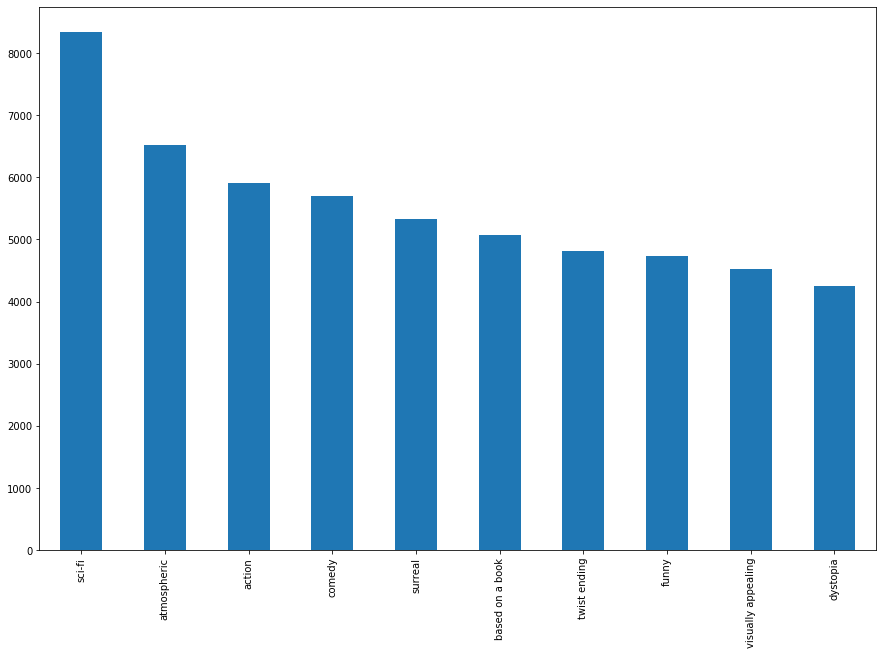

In [24]:
%matplotlib inline
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:Orange">Filters for Selecting Rows</h1>

In [ ]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

In [8]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

userId  movieId  rating   timestamp
49       1     7365     4.0  1147869033
54       1     7940     4.5  1147877967
56       1     8154     5.0  1147868865
57       1     8327     5.0  1147879375
58       1     8360     4.0  1147868682
62       1     8786     4.0  1147877853
64       1     8973     4.0  1147869211
66       1    27266     4.5  1147879365
69       1    32591     5.0  1147879538
72       2      110     5.0  1141416589
73       2      150     4.0  1141415790
74       2      151     4.5  1141415643
75       2      236     4.0  1141415659
76       2      260     5.0  1141417172
79       2      318     5.0  1141417181
80       2      333     5.0  1141415931
81       2      349     4.5  1141417045
82       2      356     4.5  1141416637
83       2      364     4.5  1141417077
85       2      457     5.0  1141416618

In [14]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

movieId                                       title  \
309      313                   Swan Princess, The (1994)   
359      364                       Lion King, The (1994)   
387      392  Secret Adventures of Tom Thumb, The (1993)   
545      551      Nightmare Before Christmas, The (1993)   
551      558                      Pagemaster, The (1994)   
580      588                              Aladdin (1992)   
586      594      Snow White and the Seven Dwarfs (1937)   
587      595                 Beauty and the Beast (1991)   
588      596                            Pinocchio (1940)   
602      610                          Heavy Metal (1981)   

                                              genres  
309                               Animation|Children  
359  Adventure|Animation|Children|Drama|Musical|IMAX  
387                              Adventure|Animation  
545               Animation|Children|Fantasy|Musical  
551      Action|Adventure|Animation|Children|Fantasy  
580      Adventure|Animation|Children|Comedy|Musical  
586         Animation|Children|Drama|Fantasy|Musical  
587  Animation|Children|Fantasy|Musical|Romance|IMAX  
588               Animation|Children|Fantasy|Musical  
602         Action|Adventure|Animation|Horror|Sci-Fi

In [15]:
movies[is_animation].head(15)

movieId                                       title  \
0          1                            Toy Story (1995)   
12        13                                Balto (1995)   
47        48                           Pocahontas (1995)   
236      239                       Goofy Movie, A (1995)   
241      244                     Gumby: The Movie (1995)   
309      313                   Swan Princess, The (1994)   
359      364                       Lion King, The (1994)   
387      392  Secret Adventures of Tom Thumb, The (1993)   
545      551      Nightmare Before Christmas, The (1993)   
551      558                      Pagemaster, The (1994)   
580      588                              Aladdin (1992)   
586      594      Snow White and the Seven Dwarfs (1937)   
587      595                 Beauty and the Beast (1991)   
588      596                            Pinocchio (1940)   
602      610                          Heavy Metal (1981)   

                                              genres  
0        Adventure|Animation|Children|Comedy|Fantasy  
12                      Adventure|Animation|Children  
47          Animation|Children|Drama|Musical|Romance  
236                Animation|Children|Comedy|Romance  
241                               Animation|Children  
309                               Animation|Children  
359  Adventure|Animation|Children|Drama|Musical|IMAX  
387                              Adventure|Animation  
545               Animation|Children|Fantasy|Musical  
551      Action|Adventure|Animation|Children|Fantasy  
580      Adventure|Animation|Children|Comedy|Musical  
586         Animation|Children|Drama|Fantasy|Musical  
587  Animation|Children|Fantasy|Musical|Romance|IMAX  
588               Animation|Children|Fantasy|Musical  
602         Action|Adventure|Animation|Horror|Sci-Fi

<h1 style="font-size:2em;color:Orange">Group By and Aggregate </h1>

In [25]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

movieId
rating         
0.5      393068
1.0      776815
1.5      399490
2.0     1640868
2.5     1262797
3.0     4896928
3.5     3177318
4.0     6639798
4.5     2200539
5.0     3612474

In [26]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

rating
movieId          
1        3.893708
2        3.251527
3        3.142028
4        2.853547
5        3.058434

In [27]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.tail()

rating
movieId        
209157      1.5
209159      3.0
209163      4.5
209169      3.0
209171      3.0

In [28]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

rating
movieId        
1         57309
2         24228
3         11804
4          2523
5         11714

In [29]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

rating
movieId        
209157        1
209159        1
209163        1
209169        1
209171        1

<h1 style="font-size:2em;color:Orange">Merge Dataframes</h1>

In [30]:
tags.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

In [31]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [32]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId           tag   timestamp  
0     791         Owned  1515175493  
1    1048  imdb top 250  1172144394  
2    1361         Pixar  1216146311  
3    3164         Pixar  1223304727  
4    3164   time travel  1223304729

More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggreagation, merging, and filters to get useful analytics
</p>

In [33]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

movieId    rating
0        1  3.893708
1        2  3.251527
2        3  3.142028
3        4  2.853547
4        5  3.058434

In [35]:
avg_ratings2 = ratings.groupby('movieId', as_index=True).mean()
del avg_ratings2['userId']
avg_ratings2.head()

rating
movieId          
1        3.893708
2        3.251527
3        3.142028
4        2.853547
5        3.058434

In [36]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  3.893708  
1                   Adventure|Children|Fantasy  3.251527  
2                               Comedy|Romance  3.142028  
3                         Comedy|Drama|Romance  2.853547  
4                                       Comedy  3.058434

In [37]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

movieId                           title                  genres  rating
59042   209157                       We (2018)                   Drama     1.5
59043   209159       Window of the Soul (2001)             Documentary     3.0
59044   209163                Bad Poems (2018)            Comedy|Drama     4.5
59045   209169             A Girl Thing (2001)      (no genres listed)     3.0
59046   209171  Women of Devil's Island (1962)  Action|Adventure|Drama     3.0

In [38]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][:5]

movieId                        title                  genres    rating
27        28            Persuasion (1995)           Drama|Romance  4.030000
46        47  Seven (a.k.a. Se7en) (1995)        Mystery|Thriller  4.079166
49        50   Usual Suspects, The (1995)  Crime|Mystery|Thriller  4.284353
108      110            Braveheart (1995)        Action|Drama|War  4.002273
109      111           Taxi Driver (1976)    Crime|Drama|Thriller  4.083479

In [39]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

movieId                                              title  \
59027   209121        Adrenalin: The BMW Touring Car Story (2014)   
59028   209123  Square Roots: The Story of SpongeBob SquarePan...   
59029   209129                           Destination Titan (2011)   
59041   209155                         Santosh Subramaniam (2008)   
59044   209163                                   Bad Poems (2018)   

                      genres  rating  
59027            Documentary     4.0  
59028            Documentary     4.0  
59029            Documentary     4.5  
59041  Action|Comedy|Romance     5.0  
59044           Comedy|Drama     4.5

In [41]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

movieId                               title  \
0        1                    Toy Story (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
6        7                      Sabrina (1995)   

                                        genres    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  3.893708  
2                               Comedy|Romance  3.142028  
3                         Comedy|Drama|Romance  2.853547  
4                                       Comedy  3.058434  
6                               Comedy|Romance  3.363666

In [42]:
box_office[is_comedy & is_highly_rated][-5:]

movieId                       title  \
58990   208911   Cheating in Chains (2006)   
58998   208939                Klaus (2019)   
59001   208945               Powder (2019)   
59041   209155  Santosh Subramaniam (2008)   
59044   209163            Bad Poems (2018)   

                                    genres  rating  
58990                               Comedy  4.0000  
58998  Adventure|Animation|Children|Comedy  4.3125  
59001                         Comedy|Drama  4.5000  
59041                Action|Comedy|Romance  5.0000  
59044                         Comedy|Drama  4.5000

In [40]:
highly_rated = box_office['rating'] >= 5.0

box_office[highly_rated][:5]

movieId                                              title  \
9414     27914  Hijacking Catastrophe: 9/11, Fear & the Sellin...   
9640     31945                         Always a Bridesmaid (2000)   
15755    83161            Deadly Delicious (Shuang Shi Ji) (2008)   
16444    86975                  As Seen Through These Eyes (2008)   
17745    92783                             Latin Music USA (2009)   

                    genres  rating  
9414           Documentary     5.0  
9640           Documentary     5.0  
15755        Drama|Mystery     5.0  
16444          Documentary     5.0  
17745  Documentary|Musical     5.0

<h1 style="font-size:2em;color:Orange">Vectorized String Operations</h1>


In [43]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [44]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [45]:
movie_genres[:10]

0          1         2       3        4     5     6     7     8  \
0  Adventure  Animation  Children  Comedy  Fantasy  None  None  None  None   
1  Adventure   Children   Fantasy    None     None  None  None  None  None   
2     Comedy    Romance      None    None     None  None  None  None  None   
3     Comedy      Drama   Romance    None     None  None  None  None  None   
4     Comedy       None      None    None     None  None  None  None  None   
5     Action      Crime  Thriller    None     None  None  None  None  None   
6     Comedy    Romance      None    None     None  None  None  None  None   
7  Adventure   Children      None    None     None  None  None  None  None   
8     Action       None      None    None     None  None  None  None  None   
9     Action  Adventure  Thriller    None     None  None  None  None  None   

      9  
0  None  
1  None  
2  None  
3  None  
4  None  
5  None  
6  None  
7  None  
8  None  
9  None

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [46]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [47]:
movie_genres[:10]

0          1         2       3        4     5     6     7     8  \
0  Adventure  Animation  Children  Comedy  Fantasy  None  None  None  None   
1  Adventure   Children   Fantasy    None     None  None  None  None  None   
2     Comedy    Romance      None    None     None  None  None  None  None   
3     Comedy      Drama   Romance    None     None  None  None  None  None   
4     Comedy       None      None    None     None  None  None  None  None   
5     Action      Crime  Thriller    None     None  None  None  None  None   
6     Comedy    Romance      None    None     None  None  None  None  None   
7  Adventure   Children      None    None     None  None  None  None  None   
8     Action       None      None    None     None  None  None  None  None   
9     Action  Adventure  Thriller    None     None  None  None  None  None   

      9  isComedy  
0  None      True  
1  None     False  
2  None      True  
3  None      True  
4  None      True  
5  None     False  
6  None      True  
7  None     False  
8  None     False  
9  None     False

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [48]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [49]:
movies.tail()

movieId                           title                  genres  year
62418   209157                       We (2018)                   Drama  2018
62419   209159       Window of the Soul (2001)             Documentary  2001
62420   209163                Bad Poems (2018)            Comedy|Drama  2018
62421   209169             A Girl Thing (2001)      (no genres listed)  2001
62422   209171  Women of Devil's Island (1962)  Action|Adventure|Drama  1962

In [50]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                   Adventure|Children|Fantasy  1995  
2                               Comedy|Romance  1995  
3                         Comedy|Drama|Romance  1995  
4                                       Comedy  1995

In [61]:
yearly_count = movies.groupby('year', as_index=False).count()

yearly_count.tail(10)

year  movieId  title  genres
130                  2013     2173   2173    2173
131                  2014     2406   2406    2406
132                  2015     2513   2513    2513
133                  2016     2488   2488    2488
134                  2017     2374   2374    2374
135                  2018     2034   2034    2034
136                  2019      994    994     994
137       Close Relations        1      1       1
138    Das Millionenspiel        1      1       1
139  Your Past Is Showing        1      1       1

In [58]:
yearly_count2 = movies[['movieId','year']].groupby('year').count()
yearly_count2.tail(10)

movieId
year                         
2013                     2173
2014                     2406
2015                     2513
2016                     2488
2017                     2374
2018                     2034
2019                      994
Close Relations             1
Das Millionenspiel          1
Your Past Is Showing        1

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:Orange">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [62]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [63]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [64]:
tags.head(5)

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

In [65]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [66]:

tags['parsed_time'].dtype

dtype('<M8[ns]')

In [69]:
tags.head(2)

userId  movieId      tag   timestamp         parsed_time
0       3      260  classic  1439472355 2015-08-13 13:25:55
1       3      260   sci-fi  1439472256 2015-08-13 13:24:16

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [70]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((1093360, 5), (692112, 5))

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [71]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

userId  movieId              tag   timestamp         parsed_time
900600  129396     2788     monty python  1135429210 2005-12-24 13:00:10
900595  129396     1732    coen brothers  1135429236 2005-12-24 13:00:36
900592  129396     1206  stanley kubrick  1135429248 2005-12-24 13:00:48
900591  129396     1193   jack nicholson  1135429371 2005-12-24 13:02:51
900607  129396     5004    peter sellers  1135429399 2005-12-24 13:03:19
900589  129396       47        brad pitt  1135429412 2005-12-24 13:03:32
900590  129396       47   morgan freeman  1135429412 2005-12-24 13:03:32
900605  129396     4011      guy ritchie  1135429431 2005-12-24 13:03:51
900604  129396     4011        brad pitt  1135429431 2005-12-24 13:03:51
900588  129396       32     bruce willis  1135429442 2005-12-24 13:04:02

<h1 style="font-size:2em;color:Orange">Average Movie Ratings over Time </h1>

## Are Movie ratings related to the year of launch?

In [72]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

movieId  rating
59042   209157     1.5
59043   209159     3.0
59044   209163     4.5
59045   209169     3.0
59046   209171     3.0

In [73]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

movieId    rating
movieId  1.000000 -0.093459
rating  -0.093459  1.000000

In [74]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

year    rating
0  1874  3.027778
1  1878  2.909091
2  1880  2.666667
3  1883  2.636364
4  1887  1.750000
5  1888  2.373042
6  1890  2.196667
7  1891  1.692842
8  1892  1.530769
9  1894  2.376825

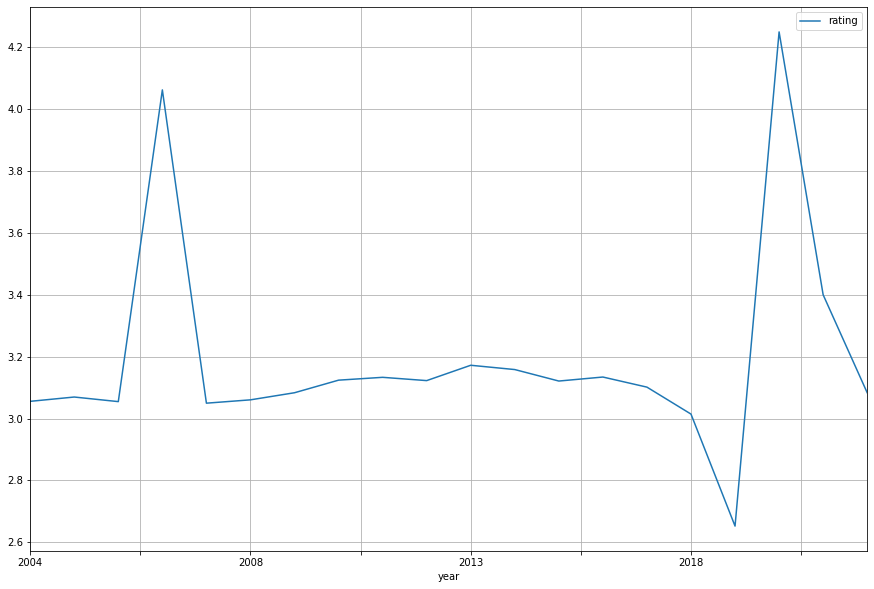

In [75]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the boxoffice movies than others? Yesin 2007 and 2019 there seems to be a spike in the movies ratings <br><br>

Does any data point seem like an outlier in some sense? 

</p>

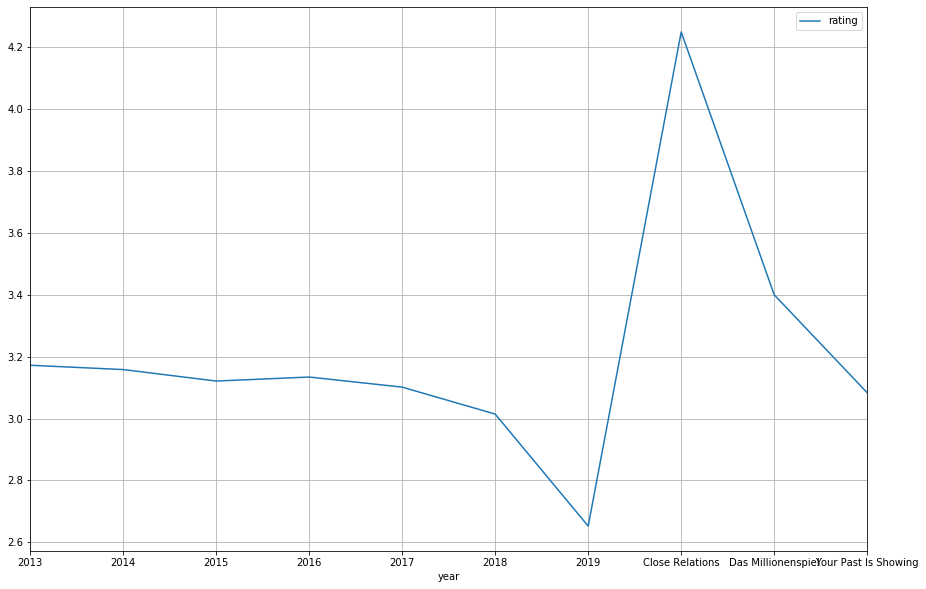

In [76]:
yearly_average[-10:].plot(x='year', y='rating', figsize=(15,10), grid=True)

There is an outlier! The year 2019 the movies rating had an average of 2.6. There are three movies without the year column